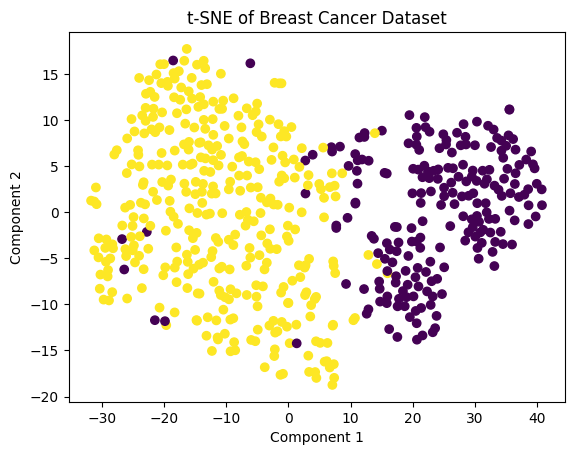

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply the tSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

# Plot
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap="viridis")
plt.title('t-SNE of Breast Cancer Dataset')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

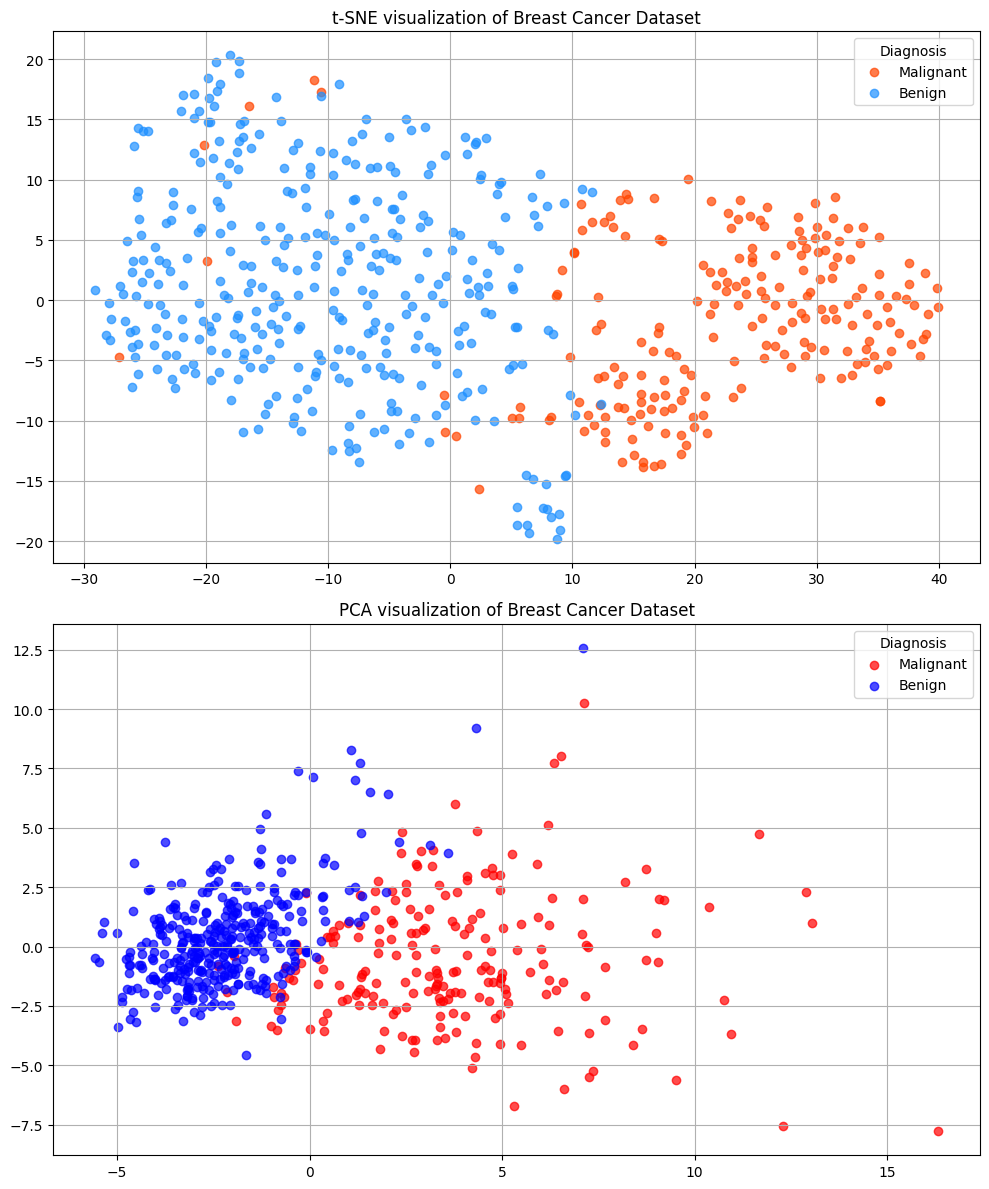

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Load the dataset
fileName = "https://raw.githubusercontent.com/Nezu-life/Data_Science_For_Medicine_and_Biology/main/datasets/breast_cancer_diagnostic_PCA.csv"
data = pd.read_csv(fileName)

X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 12))

# Colors for t-SNE and PCA
colors_pca = {'M': 'red',  # pastel orange
               'B': 'blue'}  # pastel blue

colors_tsne = {'M': '#FF4500',   # orange-red
              'B': '#1E90FF'}   # dodger blue

# Plot t-SNE results
for diagnosis, color in colors_tsne.items():
    mask = (y == diagnosis)
    ax1.scatter(X_tsne[mask, 0], X_tsne[mask, 1], c=color, label='Malignant' if diagnosis == 'M' else 'Benign', alpha=0.7)
ax1.set_title("t-SNE visualization of Breast Cancer Dataset")
ax1.legend(loc='upper right', title="Diagnosis")
ax1.grid(True)

# Plot PCA results
for diagnosis, color in colors_pca.items():
    mask = (y == diagnosis)
    ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], c=color, label='Malignant' if diagnosis == 'M' else 'Benign', alpha=0.7)
ax2.set_title("PCA visualization of Breast Cancer Dataset")
ax2.legend(loc='upper right', title="Diagnosis")
ax2.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
